# **Lesson 5**
http://course18.fast.ai/lessonsml1/lesson5.html

## **Code from lesson 1 from Intrto Machine Learning from Fast AI:**

In [0]:
#You can edit source code from modules and they will update accordingly
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Needed imports
import sys
from fastai.imports import *
from fastai.tabular import *

sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/L1RF')
from structured import *

# pandas???
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

from sklearn import metrics

In [0]:
PATH = 'gdrive/My\ Drive/Colab\ Notebooks/L1RF/data/'

In [0]:
# Parse and store the data using a panda funtion, passing the path and a list of all the date columns
PATH = PATH.replace("\\", "")
data_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, parse_dates=["saledate"])

In [0]:
#Simple display function
def display_all(df):
  with pd.option_context("display.max_rows", 1000):
    with pd.option_context("display.max_columns", 1000):
      display(df)

In [0]:
display_all(data_raw.tail()) #displays the last few items from our table

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,2011-11-02,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,2011-11-02,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,2011-11-02,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,NaN,2011-10-25,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401124,6333342,7750,1926965,21435,149,2.0,2005,NaN,NaN,2011-10-25,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


Since we want to predict the price the column that matters the most to us is 'SalePrice'
This is called our dependent variable

Here the evaluation is evaluated on the **root mean squared log error** which means they will look at the difference between the log of the prediction of the price and the log of the actual price of the test set, they'll square that and add it up.
https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a

This is a very good measuement for prices since the error is meassured relative to the quantity due to logarithm properties.

In [0]:
display(data_raw.SalePrice)

0         66000
1         57000
2         10000
3         38500
4         11000
          ...  
401120    10500
401121    11000
401122    11500
401123     9000
401124     7750
Name: SalePrice, Length: 401125, dtype: int64

In [0]:
#since we are very interested in the logarithm of the data then we convert this price row to its logarithm using numpy
data_raw.SalePrice = np.log(data_raw.SalePrice)
display(data_raw.SalePrice)

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64

**Lest create a Random Forest!!!**

A **Random Forest** is a kind of universal ML technique. It can predict categorical(discrete) or continious varioables (this is our case). In general it doesn't overfit and something cool is that it can tell you how well it generalizes without a validation set (test set). It has few if any statistical assumptions which is cool cause it's not very biased.

Another important thing is that there are two predictor types:
* Continious : Regressor **we are using this one**
* Categorical : Classifier

In [0]:
#This data set contains categorical and continious variabels and our model only likes numbers
#Hence we have to change our data frame to use numbers

#First thing to change is the dates.
#For dates we can add more columns to our data since some stuff may add more meaning to our dependent variable
#This will be categorical values represented as numbers about certain date facts that may be useful (also, it removes the original column)

add_datepart(data_raw, 'saledate')

In [0]:
data_raw.columns #prints the colums of our data frame

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [0]:
#We create a categorical value for everything that's a string (after changing the dates)
#train_cats maps converts strings to categorical variables for all columns
train_cats(data_raw)

In [0]:
#For this column we should reorder this categorie from h l m to h m l this is due to the decision
#tree formed by the random forest, also -1 are NA in the codes (we'll add one to normalize this)
data_raw.UsageBand.cat.categories
data_raw.UsageBand.cat.codes

data_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [0]:
#This function displays the percentage of null values in the dataset
display_all(data_raw.isnull().sum().sort_index()/len(data_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [0]:
#We can save the current table to disk with the follwing lines (it's stored efficently as the ram stores it)
os.makedirs('tmp', exist_ok=True)
data_raw.to_feather('tmp/raw')
#We can now just read our data from there
data_raw = pd.read_feather('tmp/raw')

In [0]:
#Lest now normalize the whole table
#This will basically first create a new column for all the columns which contain at least
#one NA and then set to 1 or 0. Then for every NA it will set the median.

#For the categories it will just add 1 and change it to it code(numerical) value we created in the past.

df, y, nas = proc_df(data_raw, 'SalePrice')

In [0]:
#SalePrice column is no longer there
df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [0]:
#Everything is a number now
#Note we are not removing Ids as dimensions for our model, this is since Random Forests dont
#React significantly regarding that kind of stuff
df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,3,950,296,41,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,3,1725,527,55,98,0,4,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,0,45,0,6,8,44,4,4,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,0,0,0,0,40,32,3,3,0,1,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200,False,False


In [0]:
#We create the FIRST but NOT last model, the parameter n_jobs is tellin this to create the model using as many cores as possible
model = RandomForestRegressor(n_jobs=-1)
#We fit the model the data we want. (independent, dependent) variables as parameters
#model.fit(data_raw.drop('SalePrice', axis=1), data_raw.SalePrice)
model.fit(df, y)
model.score(df, y)

0.9830579832167924

This error is r^2 (the closer to 1 the better) [-oo, 1]

In [0]:
#Here we will split into the last 12,000 rows of our table and use that for the validation set
#And the rest for training

def split_vals(a, n): return a[:n].copy(), a[n:].copy()

n_valid = 12000
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(data_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [0]:
# lets define the RMSE root mean squeared error

def rmse(x, y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
  res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid), m.score(X_train, y_train), m.score(X_valid, y_valid)]
  if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
  pre = ["RMSE training: ", "RMSE validation: ", "R^2 training: ", "R^2 validation: ", "OOB_SCORE: "]

  for i in range(len(res)):
    print(pre[i] + str(res[i]))

In [0]:
#We reset our model with our training data
model = RandomForestRegressor(n_jobs=-1)
%time model.fit(X_train, y_train)
print_score(model)

CPU times: user 1min 47s, sys: 138 ms, total: 1min 47s
Wall time: 54.7 s
RMSE training: 0.0906973249250306
RMSE validation: 0.25243054198871584
R^2 training: 0.9828081037357446
R^2 validation: 0.8862027483265684


## **Code from Lesson 2: Hyperparameters and tunning**

### **Speed things up**
Let's see how we can speed thing up for faster analysis.

In [0]:
#Lets take a smaller subset of only 30000 rows instead of all which area ~500,000
#The reason we are doing this is to speedup the runs ~9 seconds
df_trn, y_trn, nas = proc_df(data_raw, 'SalePrice', subset=30000, na_dict=nas)
#Note we don't update our validation set, that one will still be the big one we created previously
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [0]:
#Lets recreate our model
model = RandomForestRegressor(n_jobs=-1)
%time model.fit(X_train, y_train)
print_score(model)

CPU times: user 4.23 s, sys: 7.92 ms, total: 4.23 s
Wall time: 2.27 s
RMSE training: 0.1123042479946775
RMSE validation: 0.3795325789169413
R^2 training: 0.9724693665328303
R^2 validation: 0.742755500690484


### **Hyperparameters**

Lets start adding hyperparameters and tunning our model.

* n_estimators: how many trees we want our forest to have.
* max_depth: the maximum depth of our tree, by default this is when each leaf node has exactly 1 giving us a perfect (extremely overfitted) model.
* bootrstrap: true if there exists randomization in our estimators, false otherwise. What scikit-learn does by default is for n rows, it picks out n rows with replacement — which is called bootstrapping

* n_jobs: if it's -1 we want to use several cores for our model


In [0]:
model = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
model.fit(X_train, y_train)
print_score(model)

RMSE training: 0.5294542526018989
RMSE validation: 0.5786815513766981
R^2 training: 0.38809962677616483
R^2 validation: 0.40196410997438026


#### **Estimator (Tree) structure**
Here we have 4 values per each desition note.

* Splitting variable: This is the variable for which we are deciding to make our split (binary desition).
</br>This is decided by trying to separate our 2 groups into groups as homogeneous as possible within themselves and heterogeneous as possible with each other. Matemathically we make this desition by testing all the possible split variables with all possible binary resolution values and evaluate them according to their weighted average on the MSE. Whichever has the lowest is the best split and we use that one.

* MSE: Simply the MSE if we predict the value for all the samples in this node.
* Samples: The number of samples that fit this citeria.
* Value: The average value of all the samples in this node.

We should note that in the first node is the most naive model possible (predicting the average) which causes an R^2 of 0.

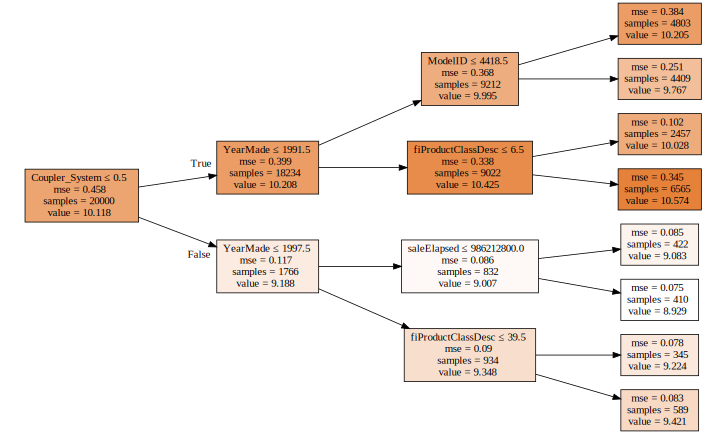

In [0]:
#Lets make a drawing of this samll estimator (tree) from our random forest.
draw_tree(model.estimators_[0], df_trn, precision=3)

In [0]:
t_df = X_train.copy()
t_df['value'] = y_train

In [0]:
#Simple verification of values = mean of subset in predictor node
a = t_df[t_df.Coupler_System<=0.5]
a = a[a.YearMade<=1985.5]
a = a[a.ModelID<=4157.5]
a ['value'].mean()

10.105903144657443

In [0]:
#Simple bigger tree
model = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
model.fit(X_train, y_train)
print_score(model)

RMSE training: 5.329070518200751e-17
RMSE validation: 0.49885801405240354
R^2 training: 1.0
R^2 validation: 0.5555715208572967


### **Bagging**

Bagging helps us create a model using randomization.

What if we created N different un-correlated models somewhat predictive?
Each model will find different insights into the data and if we take the average (Ensemmbling) of all those overfitting predictors we will reduce our error to 0 as N increases (average of random errors) as long as all sets for predictors are picked randomly and their errors are unrelated.

The way this works is that the model (in sklearn) takes a random number of rows of our data frame (with replacement) for every predictor (by default 10 predictors [the more we can use, the better]) and uses those. It's important to note that the sets of each predictor may overlap each predictor covering ~65% of the total data in average.

Also recent research has shown that un-correlation is better than presition in the trees we create.

Sklear has another class named "ExtraTreesRegresor" which is an extremely randomized trees model which does the same as the RandomForestRegressor but now instead of checking for all splits of all variables it only tries a few of randomly selected splits for every node in each tree (predictor).

How much subsamples do we end up having per tree?

According to sklearn's api:
"The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default)"

In [0]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
print_score(model)

RMSE training: 0.11410110589777392
RMSE validation: 0.39149736769082755
R^2 training: 0.971581343433313
R^2 validation: 0.7262805449614509


In [0]:
#Here we are taking all trees and predicting the validation set on all of them.
#And we store that as a matrix of 10 by 12000 (validation test rows) in preds.
preds = np.stack([t.predict(X_valid) for t in model.estimators_])
#We print the first 10 prediction, then their mean and finally the valid one
preds[:, 0], np.mean(preds[:, 0]), y_valid[0]

(array([11.156251, 11.156251, 11.156251, 11.156251, 11.156251,  9.740969,  9.433484, 11.156251,  8.987197,  9.159047]),
 10.425819957076834,
 9.104979856318357)

In [0]:
preds.shape

(10, 12000)

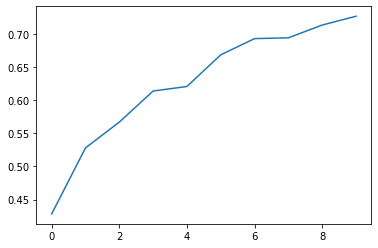

In [0]:
#Here we go through each of the 10 trees, take the mean of all of the predictions up to the ith trees
#finally we plot the r^2
#We can see it significantly improving as the number of trees grows
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)])

###**Out-of-bag (OOB) score**
Sometimes our data set will be a bit small and you dont want to pull out a validation set since that will mean our model with get crappier since the training data will be pretty small. WWYD? Theres a cool trick pretty much unique to random forests which is realizing that some of our rows didn't get used for some of our predictors so you can take those rows and pass it to the trees in which they don't appear and use that as your validation set. To calculate our preditction we will basically take every
row, see where it doesn't appear and average those trees.


In [0]:
model = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)
print_score(model)

RMSE training: 0.09791119420038592
RMSE validation: 0.3481550067694341
R^2 training: 0.9790738886742009
R^2 validation: 0.7835322195378099
OOB_SCORE: 0.8503021298785857


In [0]:
from random import randrange

xd = []

for i in range(1000):
  xd.append(False)

for i in range(1000):
  x = randrange(1000)
  xd[x] = True

count = 0
for i in range(1000):
  if(xd[i]):
    count = count+1

print(count/1000)

0.613


###**Grid Search**

Basically a Sklearn function that allows us to pass all the parameters we want to try with a list of all the values we want to choose. Then this GridSeatch will try all the combinations and with that it will choose the best combination model.

### **Defined Sub-sampling**
Previously we selected our data to be of size 30000 and we are bootstraping over such set but, why dont we just program our model to instead look into all the dataframe but just take 30000 samples per each predictor?

In [0]:
#Lets resample our data frame
df_trn, y_trn, nas = proc_df(data_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
df_trn.shape

(401125, 66)

In [0]:
#Lets set the samples we want
set_rf_samples(20000)

In [0]:
#Now it will run as fast as before but with a wider data set
model = RandomForestRegressor(n_estimators=40, n_jobs=-1)
%time model.fit(X_train, y_train)
print_score(model)

CPU times: user 33.5 s, sys: 164 ms, total: 33.7 s
Wall time: 17.6 s
RMSE training: 0.22757411449318266
RMSE validation: 0.2632148180494629
R^2 training: 0.8917618030349213
R^2 validation: 0.876271814575136


In [0]:
#Lets reset it back to normal
reset_rf_samples()

###**Grow trees less deep**
Another way to reduce overfitting is to reduce the deepness of our trees. We can do this by specifing min_samples_leaf

In [0]:
#Go back to reduced data
df_trn, y_trn, nas = proc_df(data_raw, 'SalePrice', subset=20000)
X_train, _ = split_vals(df_trn, n_trn)
y_train, _ = split_vals(y_trn, n_trn)

In [0]:
#Min_samples_leaf tells each predictor to stop a node when it has 3 or less samples in it (betweeen 1 and 25 usually)
model = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=3, oob_score=True)
model.fit(X_train, y_train)
print_score(model)

RMSE training: 0.14292534098978382
RMSE validation: 0.27078735905464474
R^2 training: 0.9572366946759064
R^2 validation: 0.8690502277800869
OOB_SCORE: 0.8469299090161191


###**Setup maximum number of features**
The less correlated your trees are, the better. Hence taking a different subset of columns every time we create a split will allow us to increase the un-correlation of the predictors.

In [0]:
#Max_features is a precentage of how much features we are comparing when selecting a split in a node of our predictor
model = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=3, max_features=0.5, oob_score=True)
model.fit(X_train, y_train)
print_score(model)

RMSE training: 0.1480264186748223
RMSE validation: 0.267005347348732
R^2 training: 0.9541297342787354
R^2 validation: 0.8726825615693563
OOB_SCORE: 0.8508943727801987


### **Interesting and useful errors**

#### **Common important errors**

There are 4 very important errors discussed in this lecture which are:


*   RMSE
*   RMSLE
*   MSE
*   R^2

---

**RMSE:**

The RMSE or Root Mean Squared Error is calculated with the following formula:

![](https://images.squarespace-cdn.com/content/v1/58c95854c534a56689231265/1531152039771-PI1ZAS4DSZCCUBST3KEK/ke17ZwdGBToddI8pDm48kC1MXajuusIgG2-0QRxSgZpZw-zPPgdn4jUwVcJE1ZvWhcwhEtWJXoshNdA9f1qD7dso8WS9HrXe-DDzLfr_qHmdYaYQTvCmLudhQgTG6nPRZVy99kA3NNj9L0tcpT6_qQ/Formula.PNG?format=750w)


Where *fi* is the predicted value and *oi* is the real value.
This means that this error is basically relative to your model and the predctions it's making with the real value. This error tends to 0 however this may mean that we are overfitting with out model.

The behind meaning of this formula is the standard deviation of the prediction errors.

https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e

---

**RMSLE:**

The RMSE or Root Mean Squared **Log** Error is calculated with the following formula:
![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR4Gx-0QNjApH2LIsAckIiuIbmpDanv4hYVWdWd6kzw1HI8WOIB)

Which is exactly the same as the RMSE but with the logarithms of the prediciton and real values. It's important to notice that this is used to consider proportionality in the error and is commonly used for measuring error in things like income or money related stuff among others.

---


**MSE:**


The MSE is essentialy the RMSE^2 hence it has the following formula:
![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSGz-xPE-mJ_Po1kyJic4B-gqyjqk3OsM6hTqGk8rqSZarLlBhn)

And essentialy as the RMSE is a very good estimation of the standar deviation of the distribution of the errors in our model this is the variance.

---

**R^2**

The R^2 error is extremly important since this is a very good measuerement of our model against itself. *We can obtain it by doing model.score* and it has the following formula:

![](https://st4.ning.com/topology/rest/1.0/file/get/2853465446?profile=RESIZE_710x)

The range of this formula is [-oo, 1] and is essentially 1 - the division of the MSE over the Variance of the model. Notice that if we just make a crappy prediction of the mean of our observations then we will get 0 as out R^2, in the other hand if we overfit the model as much as we can so that the prediciton is alwas the same as the actual value we will be getting an r^2 of 1 which is essentilay an interpolation of our data *not great for predigting*





#### **Test Sets**

So in general a very important thing to note beforw entering the hyper parameters is that we need to have 3 sets for our models: the training, validation and test sets. We will use the training to train the model, the validation to modify the hyperparameters of the model an the test one just at the very end to test that our hyeperparameters aren't overfitting our validation set.


Also an important thing to notice is that we should make our validation and tests sets according to what we are trying to predict. For instance if we want to predict the fututre sale prices of a company then we should use a validation and test set from the future of the training set.



##**Code from Lesson 3: Model interpretation, feature importance and large data**

###**Checking our condifence with our predictions**
We wouldn't be very confident of a prediciton if we haven't seen rows similar to the one we are predicting, hence we can expect that none of our predictors will have a path leading to a good prediction on such row. We would expect that as passing this row as input to all our predictors and calculating it's average we will end up with a huege standard deviation which gives us a relative understanding of how sure we are about the predcition for this row.

In [0]:
#Lets resample our data frame
df_trn, y_trn, nas = proc_df(data_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [0]:
#Sklearn doesn't have the functions needed to calculate the standard deviation
#of a given row so lets create our own function.
set_rf_samples(50000) #We can variate this number to as much as the results changes are non significant, 50k is a good number.

In [0]:
data_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,9.259131,1840702,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000
401121,6333337,9.305651,1830472,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None

In [0]:
#creating our model
model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)
print_score(model)

RMSE training: 0.20621216740955708
RMSE validation: 0.24970609071564934
R^2 training: 0.9111283179539797
R^2 validation: 0.888645891536647
OOB_SCORE: 0.8940610740656542


Lets now add the part of calculating a row's standar deviation with the trees we have and our validation set.

In [0]:
%time preds = np.stack([t.predict(X_valid) for t in model.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.5 s, sys: 8.98 ms, total: 1.51 s
Wall time: 1.51 s


(9.222901892027561, 0.3114516680532492)

In [0]:
#multi thread version
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(model, get_preds, n_jobs=8))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 115 ms, sys: 486 ms, total: 600 ms
Wall time: 2.03 s


(9.222901892027561, 0.3114516680532492)

Lets now add the standard deviation and prediction to our validation data.

In [0]:
raw_valid_cpy = raw_valid.copy()
raw_valid_cpy['pred_std'] = np.std(preds, axis=0)
raw_valid_cpy['pred'] = np.mean(preds, axis=0)

Lets now check how many times each value appeared for the Enclosure (this obviously may be any column). This time this gives us an insight that the first 3 don't really matter since they pretty much don't appear.

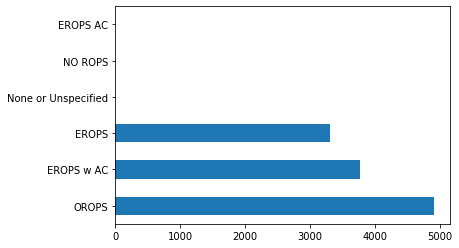

In [0]:
raw_valid.Enclosure.value_counts().plot.barh()

Now lets take the fields ['Enclosure', 'SalePrice', 'pred', 'pred_std'] and lets take filter our validation by that. Then let's just group by the enclosure types and take the mean of the sale price (actual value), the prediction and the standard deviation.

In [0]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = raw_valid_cpy[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.833094,0.275205
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.576804,0.265625
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.688879,0.221695


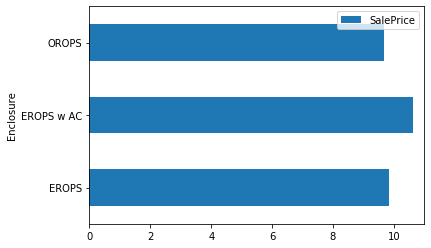

In [0]:
#Plot Sale Price
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0, 11))

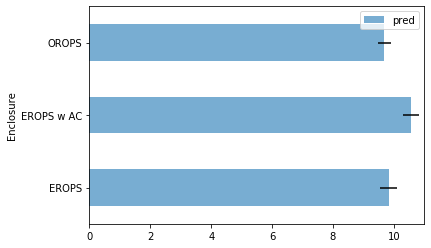

In [0]:
#Plot predictions
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0, 11))

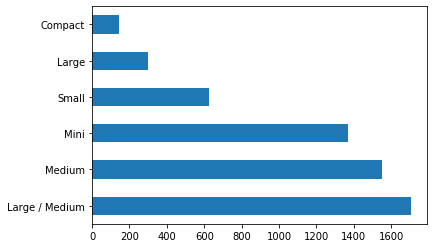

In [0]:
#Another example but with product sizes
raw_valid.ProductSize.value_counts().plot.barh()

When we try this one we see that there are less Compact rows than any other and their standard deviation is bigger. This totally makes sense since we expect our model not to be that good on prediction Compact types as it is predicting any other since we have less samples of it.

In [0]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = raw_valid_cpy[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.878504,0.343426
Large,10.470589,10.394228,0.359092
Large / Medium,10.691871,10.644896,0.301318
Medium,10.681511,10.623677,0.282735
Mini,9.535147,9.554578,0.247713
Small,10.324448,10.319922,0.307237


In [0]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Compact           0.034765
Large             0.034547
Small             0.029771
Large / Medium    0.028306
Medium            0.026614
Mini              0.025926
dtype: float64

###**Feature Importance**
Usually we also like to take a look into the importance of the features we have in our predictions.

Lets check which ones have the most importance in this columns

In [0]:
fi = rf_feat_importance(model, df_trn)
fi[:10]

,cols,imp
5,YearMade,0.176396
13,ProductSize,0.107037
37,Coupler_System,0.099152
14,fiProductClassDesc,0.077618
2,ModelID,0.058030
63,saleElapsed,0.050521
39,Hydraulics_Flow,0.047365
19,Enclosure,0.043169
10,fiSecondaryDesc,0.042354
38,Grouser_Tracks,0.033956


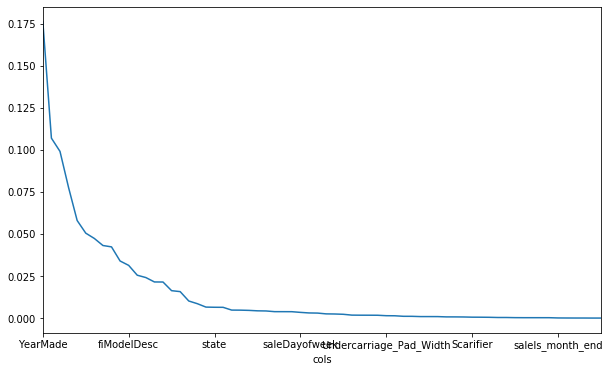

In [0]:
fi.plot('cols', 'imp', figsize=(10, 6), legend=False)

From this plots we can see that the top 30 see this way. A good thing to do with this is check with your source of information about this and verify whats going on.

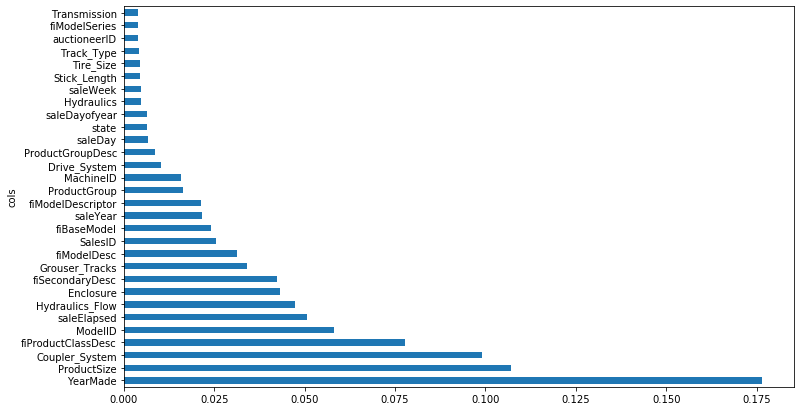

In [0]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12, 7), legend=False)
plot_fi(fi[:30]) 

This is how our feature importance looks like. Lets start removing the ones that may add noise to our trees, the redundant columns. Removing this features may make a slight difference on improving our trees and if we remove them and it gets worse then they weren't redundant after all. Usually worst case is that we don't improve our model but we make it significantly faster.

In [0]:
len(fi[fi.imp>0.005].cols)

22

In [0]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

22

In [0]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [0]:
model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)
print_score(model)

RMSE training: 0.20733904096526337
RMSE validation: 0.24670701217227275
R^2 training: 0.9101543620206013
R^2 validation: 0.8913046510076014
OOB_SCORE: 0.8936689304359311


Removing truly redundant columns shouln't make our model worse and if it does make it worse then they weren't redundant afer all. We may see a slight improvement sometimes since when deciding our splits it haves lets things to worry about trying and it's going to less often find a crappy column so it has a slightly better opportunity of creating a slightly better tree with slightly less data but it won't change by much however we do are making our model faster. An important thing to note is that when we remove redudndant colums we are also most likely removing **sources of colinearity** (related to other columns). Colinearity doesn't make your random forest less predictive (colinearity won't affect your random forest) but if you have 2 related columns and one of them is a strong driver of the dependent variable then the importance will sort of split between the 2 colinear columns. By removing some of those columns with very little impact it makes the feature importance plot clearer. By instance Year made was very close to Coupler System before but there must have been a bunch of colinear stuff correlated to year made since now it's importance is bigger (which makes sense since there are a lot of features that where added as the year made increases in the industrial equipment). This new model is now a bit better but what matters to us is that there's less colinearity to confuse *us* and we can understand the data better.

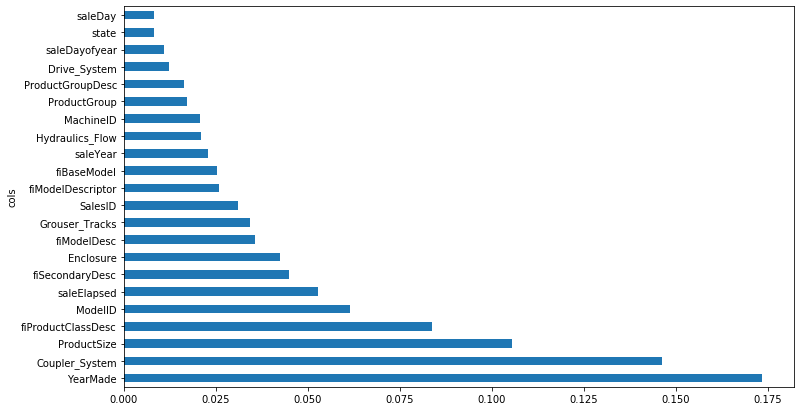

In [0]:
fi = rf_feat_importance(model, df_keep)
plot_fi(fi)

####**Feature Importance Tecnhique**
One very cool tecnhique we can use is to take our validation set and start to make random shuffles in the colums for which we want to check their importance. This previous step will usually make
this column pretty much useless and now we can just check how our RMSE changes when we do this to each column. This is basically what is being done with the **rf_feature_importance()** function.

###**How to deal with large data sets advice**
We might find ourselves dealing with huge datasets of maybe about 100 million rows. Creaing Models this big often is very time consumming so we should seek to speed things up keeping our model as effective as possible.

**When to use Random Forests?**

It's always worth trying at least at the beginning to have a better understanding of our data. A better question is when to try something else and that's for structured data (images, sounds, etc.) you most certainly try deep learing for those.
</br> </br>
**How to save data to memory?**

```
types = {'id': 'int64',
         'item_nbr': 'int32',
         'store_nbr': 'int8',
         'unit_sales': 'float32',
         'onpromotion': 'object'}
%%time
df_all = pd.read_csv(f'{PATH}train.csv', parse_dates=['date'], 
                     dtype=types, infer_datetime_format=True)
```
Here we are setting up our types to just the neccesary.
By using a UNIX command shuf, you can get a random sample of data at the command prompt and then you can just read that. This is a good way, for example, to find out what data types to use — read in a random sample and let Pandas figure it out for you. In general, t's good to do as much work as possible on a sample until you feel confident that you understand the sample before you move on.

```
shuf -n 5 -o sample_training.csv train.csv
```
</br> </br>
**Handling date related data (most of it usually)**

Let's say for instance, in this case we need to predict the last 2 weeks of a sale related variable for a store and we are given as our training set 4 years of data. If we are picking a smaller set of data to start training our model we must pick the most recent one, maybe the las year or so. It is not that there is no useful information from four years ago so we do not want to entirely throw it away. But as a first step, if you were to submit the mean, you would not submit the mean of the whole year sales, but probably want to submit the mean of last month’s sale.And later on, we might want to weight more recent dates more highly since they are probably more relevant. But we should do bunch of exploratory data analysis to check that.

**How to make training models faster?**
When training a model this big there is stuff we can optimize. For random forest applying the "set_rf_samples" is great. Also doing this:
```
x = np.array(trn, dtype=np.float32)
```
helps a lot when tweaking the hyperparameters of our model since this is a very time consumming operation that's always done when training our model. If we are using the same data over and over again then we can do this and it will save us a lot of time while tweaking our model.
```
%prun m.fit(x, y)
```
will give us this insight.

</br> </br>
**What if the RMSE is a bit high?**

Well  this is probably a common situation, most of the insight around how much of something you expec to sell tomorrow is likely wrapped up in the details about where the store is, what kind of thins they tend to sell at the store, for a give item, what category of item it is etc. RandomForests don't have the ability to do anything other than create binary splits on the features we provided it. It's agnostic to details such type of items or location of stores. Since this ability is limited then increasing the range of our data frame to more years would probably help to get us some useful inisghts; the only disadvantage is that some of the data can be pretty old. Also pulling data from external datasets is really useful and a very common practice.

</br> </br>
**Improving our validation set**

If we don't have a validation set then it's very hard to create a good model. Try to find the best model with similar rows to the ones you want to predict. Also normally you don't want to use your test set for anything other than right at the end of the competition or right at the end of the project to find out how you did but there's something you can do with your test set and that is to calibrate your validation set:

![](https://miro.medium.com/max/600/1*1SKL7RKLaXwD7J4BDKJoHQ.png)

What this person did was to create several models and submited them to kahhle to fin their score. X-axis is the score Kaggle told us on the leaderboard, and y-axis he plotted the score on a particular validation set he was trying out to see whether the validation set was going to be any good. If your validation set is good, then the relationship between the leaderboards score (i.e. the test set score) should lie in a straight line. Ideally, it will lie on the y = x line, but honestly that does not matter too much as long as relatively speaking it tells you which models are better than which other models, then you know which model is the best. In this case, Terrance has managed to come up with a validation set which looks like it is going to predict the Kaggle leaderboard score well. That is really cool because he can go away and try a hundred different types of models, feature engineering, weighting, tweaks, hyper parameters, whatever else, see how they go on the validation set, and not have to submit to Kaggle. So you will get a lot more iterations, a lot more feedback. This is not just true for Kaggle but every machine learning project you do. In general, if your validation set is not showing nice fit line, you need think carefully [48:02]. How is the test set constructed? How is my validation set different? You will have to draw lots of charts and so forth to find out.

</br> </br>
**Tips for validation sets:**

* Close by date (i.e. most recent)
*First looked at the date range of the test set (16 days), then looked at the date range of the kernel which described how to get 0.58 on the leaderboard by taking an average (14 days).
* Test set begins on the day after pay day and ends on a pay day.
* Plot lots of pictures. Even if you did not know it was pay day, you want to draw the time series chart and hopefully see that every two weeks there is a spike and make sure that you have the same number of spikes in the validation set as the test set.

##**Code from Lesson 4: 1-hot encoding, removing non-trivial redundancy, partial dependence and tree interpreter**

###**Follow up on Feature importance**

An important thing to note is that when we talk about collinearity we are not strictly talking about a linear relationship between 2 or more features but just a relathionship between them. When we have colinearity between 2 or more features it means that we will often underestimate their importance using the techniques we prevoiusly saw. An important and clear relation in our current features are 'year_made' and 'sale_date' since it makes a lot of sense that the price changes with the combination of both of them.

**Other ways of measuring feature importance?:**

Logistic regression:

```
a x0  +  b x1  +  c x2 ... = y
```

Logistic regression will always have the best answer only if you where able to adjust your model to be perfect, this means if you transformed the variables you had to modify and found the proper interactions between the variables that are related; if this preprocessing wasn't done correctly then this means that your coefficients are wrong and are telling you that in the totally wrong model we just created this is how important those things are, which is basically meaningless. However the Random Forest feature importance will tell us in this extremely high parameter, highly flexible functional form with few if any statistical assumptions this is your feature importance.

###**One hot encoding**
One-hot encodign is when we have a categorical feature and we make as much colums as it's cardinality and we just set those as a boolean value wether that's the one it is or not and we finally remove the column with the original categorical values.

One importance of one-hot encodings is making our tree more predictive. Lets say we have several values for instange H, M, L, and N/A. Now what if the only thing that mattered was one of those. What if it only mattered if we had an L value. In this case we will need 2 splits separating the data which is less efficient and will harve our data making our tree less reach and hence less effective.

In [0]:
#max_n_cat is the maximum cardinality of a column in order to apply one-hot encoding to it.
reset_rf_samples() #just in case
df_trn2, y_trn, nas = proc_df(data_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)
print_score(model)

RMSE training: 0.11818518599407919
RMSE validation: 0.23369373168878183
R^2 training: 0.97080819750021
R^2 validation: 0.9024691293532053
OOB_SCORE: 0.9102374187974909


In this case we can see our model did't got more predictive and this just depends if the fact that if in our data single categories are quite important. In this particular case it didn't made it more predictive however we now can see stuff clearer in our feature importance plot.

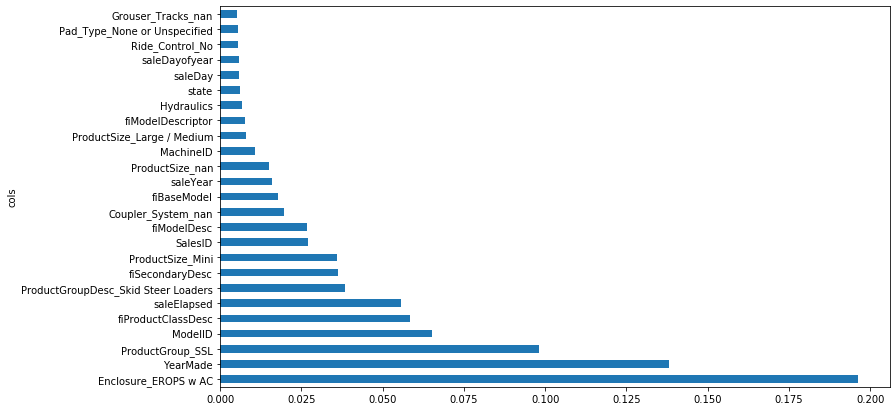

In [0]:
fi = rf_feat_importance(model, df_trn2)
plot_fi(fi[:25])

Now we can see something very improtant in the above plot. In the past Enclosure was in our top 10 important features but it wasn't the best from the best. Now we see that Enclousure_EROPS w AC is the most important driver, even more than YearMade (most important one in the past). This means we should always try one-hot encodig at least for the purpose of interpeting our model and data.

###**Removing non-trivial redundant variables**
We already seeked to remove redundant variables (measuring the same thing) in **feature importance** from lesson 3 but now lets see how we can remove non-trivial redundant variables using dendrograms.

A dendrogram is a hierarchical clustering. Cluster analysis is looking at rows or columns and find which ones are similar to eachother. A basic tecnique is just plotting and seeing which points are close to eachother. Hierarchical clustering basically looks for which to objects are closer and it deletes them and replaces it with the midpoint of both and we do that over and over again.

In [0]:
from scipy.cluster import hierarchy as hc

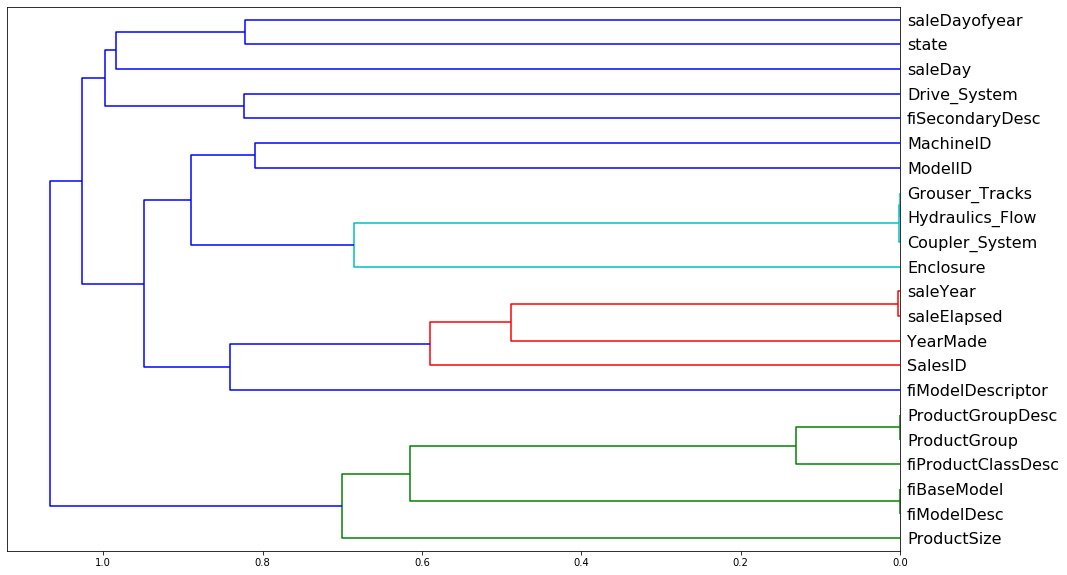

In [0]:
#Correlation matrix
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)

#Distance matrix
corr_condensed = hc.distance.squareform(1-corr)

#Conversion 
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16, 10))

#Creating dendogram
dendogram = hc.dendrogram(z, labels = df_keep.columns, orientation = 'left', leaf_font_size=16)

**Interpretation of dendogram:**
* Horizontal axis represents how similar (measuring the same thing) the variables are (the smaller the more similar).
* This is measuered using correlation coefficients.


**In the above dendogram we can see that:**
* saleYear and saleElapsed are basically measuring the same thing:
 * saleYear: year when sale happened
 * saleElapsed: number of days before sale since the first date in the data set.
* GrouserTracks, CuplerSistem and HydraulicsFlow seem to be measuring the same thing. CouplerSystem turned super important in our feature importance but it turns out that what matters the most rather than CouplerSystem is wether the vehicle has HydraulicsFlow and or GrouserTracks.

**Correlation Coefficients:**
Correlation is almost the same as the r^2 but is bewteen 2 variables rather than a variable and its prediction.

Ranked correlation is replacing every point by it's rank when comparing 2 variables. This allows us to determine if theres a growing/descending relation between them: as one changes the other one changes as well in the same direction. This correlation is good for Random Forest since they care about *ordering* and not about linearity. **Spearmanr** is the name of the most common ranked correlation algorithm.


In [0]:
def get_oob(df):
  model = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
  x, _ = split_vals(df, n_trn)
  model.fit(x, y_train)
  return model.oob_score_

Lets now see what happens when we start removing this similar variables from our dataset. But first we have to get our baseline.

In [0]:
get_oob(df_keep)

0.9067262234377257

Lets remove one at the time.

In [0]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
  print(c, get_oob(df_keep.drop(c, axis=1)))

saleYear 0.9057548651966723
saleElapsed 0.9044800564581673
fiModelDesc 0.9050676298592168
fiBaseModel 0.9048299244080723
Grouser_Tracks 0.9060288783729099
Coupler_System 0.9069302473622771


Seems like anythig we drop doesn't get better and only causes a 3rd decimal place problem in the above results. Now lets try to remove only one of the related ones.

In [0]:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks'] 
get_oob(df_keep.drop(to_drop, axis=1))

0.905213771748341

Now we can see that this result is extremely close to our baseline as to be meaningless (change in the 4th decimal) so this sounds good; simpler is better.

In [0]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [0]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns))

In [0]:
#keep_cols = np.load('tmp/keep_cols.npy')
df_keep = df_trn[df_keep.columns]

Now lets see how this model look on the full data set

In [0]:
reset_rf_samples()

In [0]:
model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)
print_score(model)

RMSE training: 0.12625732690001926
RMSE validation: 0.22774773817914595
R^2 training: 0.9666843718081949
R^2 validation: 0.9073690497757647
OOB_SCORE: 0.9079324889351076


We can see now a great improvement over out original model above with this new data set.

###**Partial Dependence**
At this point we already got rid of all the columns we feel comfortable removing: the ones that had a very low feature importance or where highly related to other variables and the model didn't got worse significantly when we removed them.
Now we'll try to understand our data better by taking advantage of our model using **partial dependence**. We will find: for the features that are important, how do they relate to the dependent variable?

In [0]:
set_rf_samples(50000)

The next anallyisis will be a little easier if we use the 1-hot encoded categorical variables, so let's load them up again.

In [0]:
df_trn2, y_trn, nas = proc_df(data_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

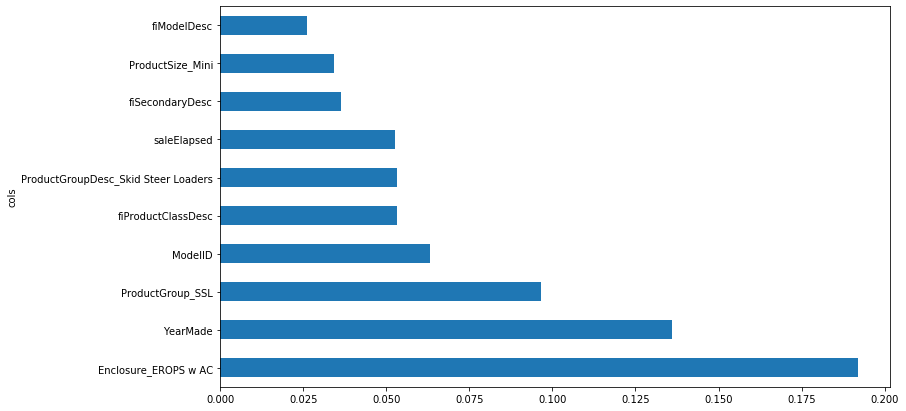

In [0]:
plot_fi(rf_feat_importance(model, df_trn2)[:10])

Again we can see in the above chart our top 10 features, let's try to learn more about them. Since YearMade is a huge determinant it would be a good idea to plot YearMade against saleElapsed(similar to saleYear) as we've seen already it seems to make sense that both are important but it seems very likely that they both combine together to find how old was the product when it was sold.

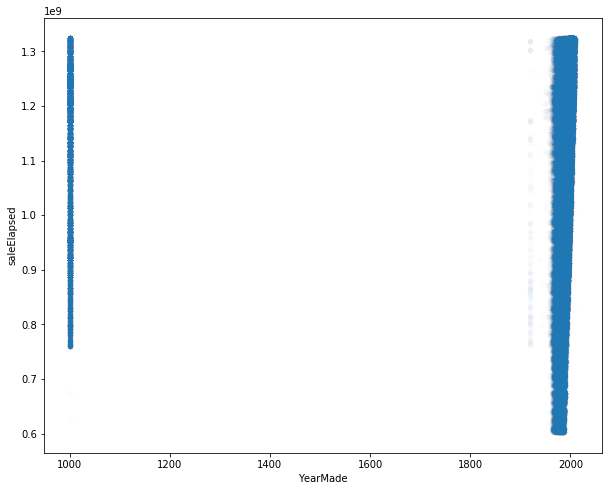

In [0]:
data_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize =(10, 8))

As we can see in the above char some sales happened in the year 1000 which is nonsense. This may mean the data has this as a dummy value. We should change it later.

In [0]:
#Getting a 500 sample to visualize data better.
x_all = get_sample(data_raw[data_raw.YearMade>1930], 500)

Let's now have a look into YearMade and SalePrice:

In [0]:
!pip install plotnine

In [0]:
!pip install scikit-misc

Now lets see the relation between YearMade and SalePrice. In th ebelow chart we can see that it's kind of weird since we would expect a more uniform increasing SalePrice as the year made is closer to today. Most likely this minor issue is due to the fact that there's a lot of interactions going on in the background; for instance: why did the price droped from 1995 to 2000? Is it because such products are less valuable? or was it because most of them where sold at that time and maybe there was a resession or maybe just at that time people where buying less expensive vehicles. Who knows this? well our model might help us out with that part. What we really want to answer is: What is the relationship between YearMade and SalePrice all other things being equal.

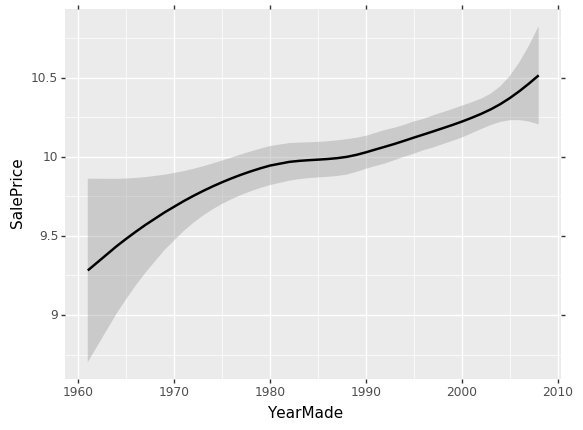

<ggplot: (8789063120027)>

In [0]:
from plotnine import *
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

Lets see what our model predicts being everything equlal but the year.

In [0]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

In [0]:
!pip install PDPbox

In [0]:
??pdp.pdp_isolate

In [0]:
from pdpbox import pdp

def plot_pdp(feat, clusters=None, feat_name=None):
  feat_name = feat_name or feat
  p = pdp.pdp_isolate(model, x, x.columns, feat)
  return pdp.pdp_plot(p, feat_name, plot_lines=True, cluster=clusters is not None, n_cluster_centers=clusters)
  

Now what this is doing is basically taking the x samples we have and changing their year to all the possible years and plot that. This results in finding the relation between YearMade and SalePrice with the rest of the variables being the same. Now this is the real behaivor SalePrice is taking towards the different years we can have. Each of the blue lines is one of the x different rows.

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5cfa3c1d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5cface6a0>})

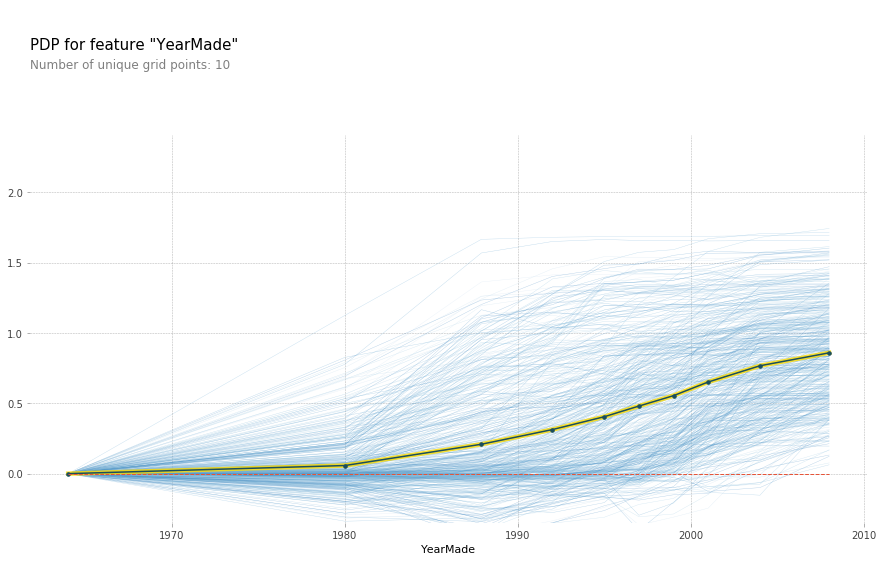

In [0]:
plot_pdp('YearMade')

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5cf05ea90>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5cf0576d8>})

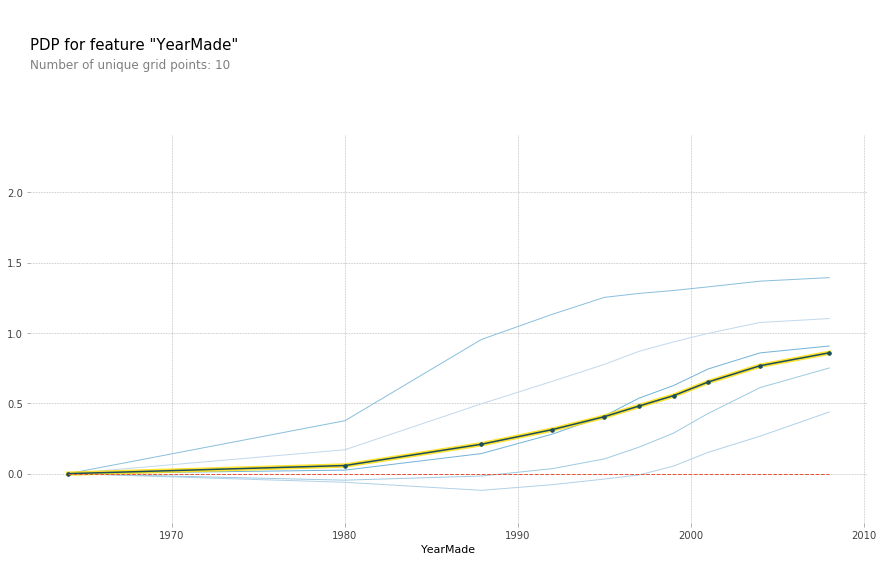

In [0]:
#Now with clusters
plot_pdp('YearMade', 5)

Usually doing this kind of insights of feature interpretation allows to think about transforming variables or creating interactions, etc. Also this one is very useful in real life to talk to the client about this kind of stuff and showing them how some feture issues are due to external variables.

Now lets have a look at the interaction plot for SaleElapsed and YearMade together and their impact on price. It makes sense and it's very clear that this 2 things are driving price together so it will be good to add some kind of **interaction** term and see what happens.

In [0]:
feats = ['saleElapsed', 'YearMade']
#p = pdp.pdp_interact(model, x, x.columns, feats)
#pdp.pdp_interact_plot(p, feats, plot_params = {'font_color' : 'white'})

Lets have a look at more features...

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5cefbf630>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5cf029208>})

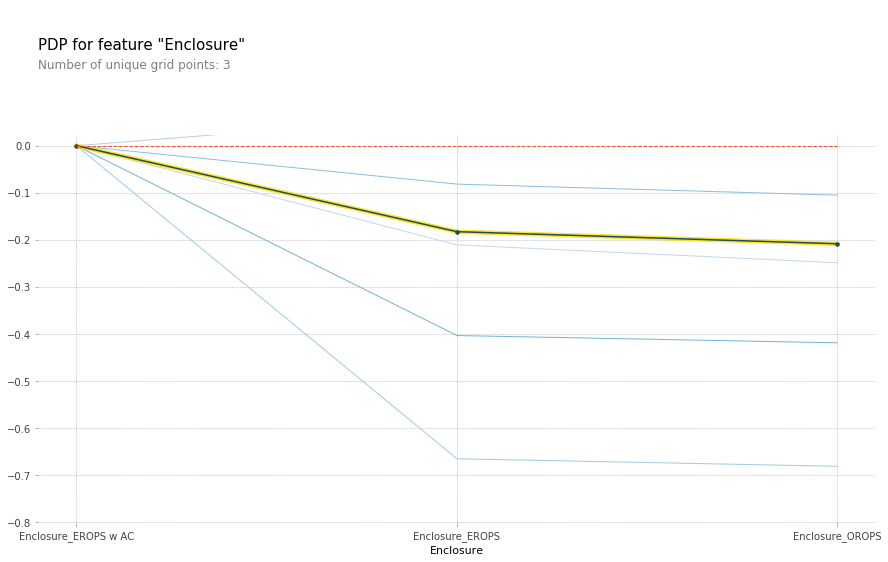

In [0]:
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure')

In general we can see that as expected Enclosure_Eropss w AC has a higher value that the other 2 whih are pretty much the same. And this makes sense since this interacts a lot with the year_made because AC must have been added more recently to this kind of vehicles.

Lets now normalize the data with the info we just obtained and add the saleElapsed-YearMade **interaction** and try it out.

In [0]:
data_raw.YearMade[data_raw.YearMade<1950] = 1950
df_keep['age'] = data_raw['age'] = data_raw.saleYear-data_raw.YearMade

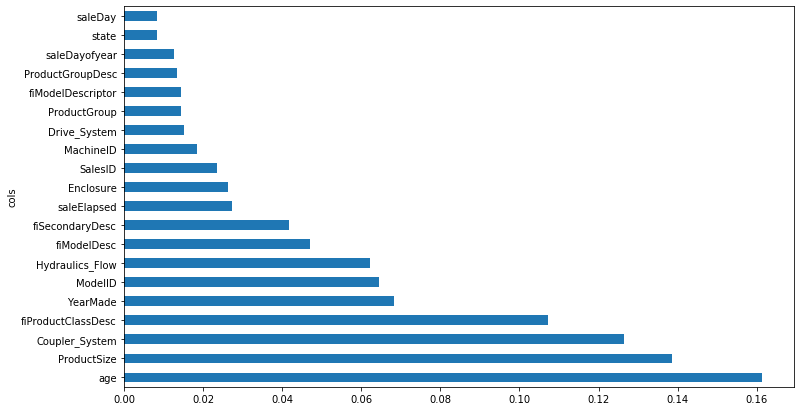

In [0]:
X_train, X_valid = split_vals(df_keep, n_trn)
model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
model.fit(X_train, y_train)
plot_fi(rf_feat_importance(model, df_keep))

As we can see in the above chart now Age is the most important feature from our data. However we should remember that a RF can create an **interaction** with muliple splitpoints so we should **not** assume this will give us a better result. Here our score improved just a tiny bit but in some cases it might have actually got a bit worse.

In [0]:
print_score(model)

RMSE training: 0.20697966955832472
RMSE validation: 0.24797968497087353
R^2 training: 0.9104655428918087
R^2 validation: 0.8901803179821912


###**Tree Interpreter**
Useful tool to understand the result of a given column.

In [0]:
!pip install treeinterpreter

In [0]:
from treeinterpreter import treeinterpreter as ti

In [0]:
df_train, df_valid = split_vals(data_raw[df_keep.columns], n_trn)

In [0]:
row = X_valid.values[None, 0]
row

array([[      1999,          5,          0,         17,        665, 1284595200,          0,          1,          0,
              3232,    4364751,          0,          4,    2300944,          0,          4,         16,         35,
               259,         11]])

In [0]:
prediction, bias, contribution = ti.predict(model, row)

Prediction is the prediction for the column and bias is the total average of all the rows.

In [0]:
prediction[0], bias[0]

(array([9.330841]), 10.105661140440176)

Contributions is how much each feature provided in average to the prediction relative to the average.

In [0]:
[o for o in zip(df_keep.columns, df_valid.iloc[0], contribution[0])]

[('YearMade', 1999, 0.0644436487657524),
 ('ProductSize', 'Mini', -0.4906129201742143),
 ('Coupler_System', nan, 0.055093928676644664),
 ('fiProductClassDesc',
  'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
  -0.19610405048458918),
 ('ModelID', 665, 0.02045848998614912),
 ('saleElapsed', 1284595200, -0.01938790640764081),
 ('Hydraulics_Flow', nan, 0.02892975908292241),
 ('Enclosure', 'EROPS', -0.018169840809870674),
 ('fiSecondaryDesc', nan, -0.047151935352249374),
 ('fiModelDesc', 'KX1212', -0.06430803660390985),
 ('SalesID', 4364751, -0.0042260014864527575),
 ('fiModelDescriptor', nan, -0.03885284855703754),
 ('ProductGroup', 'TEX', 0.009544954559056861),
 ('MachineID', 2300944, 0.017074252572891035),
 ('Drive_System', nan, 0.013342758062578985),
 ('ProductGroupDesc', 'Track Excavators', 0.01185063050607904),
 ('saleDay', 16, -0.0042813399870210486),
 ('state', 'Ohio', 0.005969730835828901),
 ('saleDayofyear', 259, -0.021365670599156415),
 ('age', 11, -0.09706818932165077)]

In [0]:
#Proof
res = bias[0]
for i in contribution[0]: res = res + i
res

9.330840553704292

## **Lesson 5**
* Review on past topics
* Extrapolation: Making sure our model is capable of extrapolating for the test set.

###**Review on past topics:**

* A good machine Learning model must be good at generalizing, this is the whle purpose of ML. The way we should check if our model generalizes well is by having to 2 sets other than the training set: **validation set** and **test set**.

* **Choosing our validation and test set:**
We should think about what we would be predicting. Must if not all the time we want to predict the future of something so in such case our validation set and test set should be from the future relative to our training set and must not be completely random. Now a good thing to do generaly is to choose our validation set to be in the past from the test set and once our model is good for our validation set gives good results then we merge the training set and validation set and use that as our model and to test our test set.
Another important thing is that if we end up getting a good result for our validation set but not for our test set that means we are overfitting the model for our validation set; the wey to prevent this is to follow the good practices of ML.

* **OOB_Score:** Our Out of Bounds score is something very similar to the validation score and on average is a little less good. When you have a good result on the OOB it means you are generalizing well however if that doesn't look good on the validation set then that means you are sort of interpolating when your objective is to froecast.

* **Choosing a good training set:** When choosing your traing set you should be very careful to make sure it's useful to train your model to forecast. A good technique is to give a weigth to most resent rows and while bootrstrapping pick most recent rows with a higher probability or alternatively make your data frame closer to today.

* **Checking if our Validation set is a true representative of our test set:** A good thing to do here is to build 5 models and vary them in how good they are. Then score them in the VS and in the TS. If we build a plot of the scores then we should see a linear relation, otherwise we should modify our validation set. It's totally valid to modify our training set to get our 5 distrinct models.

* **Cross Validation:** not very useful for forecasting.

###**Extrapolation**

Random Forests have a small issue with extrapolation, and if for instance the dependent variable changes linearly with time a linear model will notice that and extrapolate however a RandomForest won't add for that. A simple way of handling this is to not use time variables as predictiors if there's something else we can use that can give us a stronger relationship that will work in the future.

What is the difference between our VS and our TrS? If we know this then we know what are the predictors which have a strong temporal component and therefore they might be irrelevant by the time we use it on our test set isntead.
</br></br>
For this we can create a random fortest where the dependent varaible is wether it's in the validation set or not.

In [0]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

The RF we created predicts wether a variable is or not on the validation set and in this case we train our model with everything and our validation set.
If your variables where not time dependent then it shouldnt be possible to figure out if something is in the validation set or not. As we can see we can figure it out with a lot of presicion currently.

It's important to note that this is a great trick in Kaggle since often contests won't tell you if the Test Set is from the future of the training set or not. So you can put the test set and the training set together, create a new column 'is_test' and see if we can predict it. If you can then that means you don't have a random sample which means that you have to figure out how to create a VS from it.

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
model.fit(x, y)
model.oob_score_

0.9999825490807105

In [0]:
fi = rf_feat_importance(model, x)
fi[:10]

,cols,imp
10,SalesID,0.757195
5,saleElapsed,0.151720
13,MachineID,0.075151
0,YearMade,0.004370
9,fiModelDesc,0.003655
4,ModelID,0.002476
7,Enclosure,0.001982
18,saleDayofyear,0.001238
8,fiSecondaryDesc,0.000647
2,Coupler_System,0.000395


Now that we check the feature importance above we can see that SalesId, saleElaped and MachineId are very important features for this model. This makes total sense since probably SalesId is asigned with a countes as well as MachineId; saleElapsed also makes sense since that's the number of days since the product was added to the data set. Lets remove those 3.


In [0]:
feats = ['SalesID', 'saleElapsed', 'MachineID']
(X_train[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,389125.000000,3.891250e+05,389125.000000
mean,1800.452485,1.084797e+06,1206.796148
std,595.627288,1.803913e+05,430.850552
min,1139.246000,6.009984e+05,0.000000
25%,1413.348000,9.666432e+05,1087.016000
50%,1632.093000,1.134605e+06,1273.859000
75%,2210.453000,1.234138e+06,1458.661000
max,4364.741000,1.325117e+06,2313.821000


In [0]:
x.drop(feats, axis=1, inplace=True)

In [0]:
model = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
model.fit(x, y)
model.oob_score_

0.9783384231847928

We can see a small improvement.

In [0]:
fi = rf_feat_importance(model, x)
fi[:10]

,cols,imp
16,age,0.242287
0,YearMade,0.189005
15,saleDayofyear,0.151217
4,ModelID,0.082102
8,fiModelDesc,0.068329
14,state,0.062200
13,saleDay,0.061651
3,fiProductClassDesc,0.034848
7,fiSecondaryDesc,0.024848
6,Enclosure,0.021559


In [0]:
set_rf_samples(50000)

In [0]:
feats = ['SalesID', 'saleElapsed', 'MachineID', 'age', 'YearMade', 'saleDayofyear']

In [0]:
X_train, X_valid = split_vals(df_keep, n_trn)
model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)
print_score(model)

RMSE training: 0.2080597645041841
RMSE validation: 0.2485013693282289
R^2 training: 0.9095286582446642
R^2 validation: 0.8897177682124278
OOB_SCORE: 0.8929750366856951


Lets see how removing each variable affects our score. If the score doesn't get affected then this means there where likely other non-temporal variables that were able to predict the same. Otherwise we should keep them.

In [0]:
for f in feats:
  df_subs = df_keep.drop(f, axis=1)
  X_train, X_valid = split_vals(df_subs, n_trn)
  model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
  model.fit(X_train, y_train)
  print(f)
  print_score(model)

SalesID
RMSE training: 0.20910983280804804
RMSE validation: 0.2454889148446266
R^2 training: 0.9086131441688955
R^2 validation: 0.8923753514446143
OOB_SCORE: 0.8926199607179593
saleElapsed
RMSE training: 0.21423043308972517
RMSE validation: 0.2541038228466285
R^2 training: 0.9040826530843828
R^2 validation: 0.8846890973990118
OOB_SCORE: 0.8871354918234539
MachineID
RMSE training: 0.20687119463019055
RMSE validation: 0.24496711920661057
R^2 training: 0.9105593656213617
R^2 validation: 0.8928323854347632
OOB_SCORE: 0.895020753739352
age
RMSE training: 0.20917906957510005
RMSE validation: 0.24701066588637885
R^2 training: 0.9085526173360732
R^2 validation: 0.8910369159454895
OOB_SCORE: 0.8921101194174523
YearMade
RMSE training: 0.20935688865306087
RMSE validation: 0.251702341374873
R^2 training: 0.9083970759530955
R^2 validation: 0.8868583560195809
OOB_SCORE: 0.8919656626604875
saleDayofyear
RMSE training: 0.2085536723776294
RMSE validation: 0.24551450071871356
R^2 training: 0.90909861310

In [0]:
reset_rf_samples()

In [0]:
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)
print_score(model)

RMSE training: 0.13932609342038438
RMSE validation: 0.21873592330340685
R^2 training: 0.9594304915060253
R^2 validation: 0.9145546955904288
OOB_SCORE: 0.9090294691749563


As we can se we got a good improvement over theresults, now lets give it more estimators!!

In [0]:
model = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)
print_score(model)

RMSE training: 0.08083807126386926
RMSE validation: 0.2107288985966832
R^2 training: 0.9863426414205165
R^2 validation: 0.9206958036379634
OOB_SCORE: 0.914467629825236


In [0]:
plot_fi(rf_feat_importance(model, X_train))

NameError: ignored